In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_excel('/content/Employee-turnover (1) (2).xlsx')

In [ ]:
df.head()

,Employee Count,Employee ID,Department,Job Role,Gender,Age,Marital Status,Education,Education Field,Business Travel,...,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction,Attrition (Yes/No)
0,1,1,Sales,Sales Executive,Female,41,Single,College,Life Sciences,Travel_Rarely,...,8.0,6,4,0,5,Medium,NaN,Bad,Low,Yes
1,1,2,Research & Development,Research Scientist,Male,49,Married,Below College,Life Sciences,Travel_Frequently,...,10.0,10,7,1,7,High,NaN,Better,Very High,No
2,1,4,Research & Development,Laboratory Technician,Male,37,Single,College,Other,Travel_Rarely,...,7.0,0,0,0,0,Low,NaN,Bad,Medium,Yes
3,1,5,Research & Development,Research Scientist,Female,33,Married,Master,Life Sciences,Travel_Frequently,...,8.0,8,7,3,0,Very High,NaN,Better,High,No
4,1,7,Research & Development,Laboratory Technician,Male,27,Married,Below College,Medical,Travel_Rarely,...,6.0,2,2,2,2,Low,NaN,Better,Very High,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee Count              1470 non-null   int64  
 1   Employee ID                 1470 non-null   int64  
 2   Department                  1470 non-null   object 
 3   Job Role                    1470 non-null   object 
 4   Gender                      1470 non-null   object 
 5   Age                         1470 non-null   int64  
 6   Marital Status              1470 non-null   object 
 7   Education                   1470 non-null   object 
 8   Education Field             1470 non-null   object 
 9   Business Travel             1470 non-null   object 
 10  Distance From Home (kms)    1439 non-null   object 
 11  Job Involvement             1470 non-null   object 
 12  Job Level                   1464 non-null   float64
 13  Job Satisfaction            1458 

In [ ]:
df.null=pd.DataFrame(df.isnull().sum(),columns=["Null Values"])
df.null

<ipython-input-7-d2b3c523952b>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.null=pd.DataFrame(df.isnull().sum(),columns=["Null Values"])


,Null Values
Employee Count,0
Employee ID,0
Department,0
Job Role,0
Gender,0
Age,0
Marital Status,0
Education,0
Education Field,0
Business Travel,0


In [ ]:
list1=[]
for i in df.null["Null Values"]:
  list1.append(i/len(df))
df.null["Ratio"]=list1
df.null

,Null Values,Ratio
Employee Count,0,0.000000
Employee ID,0,0.000000
Department,0,0.000000
Job Role,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Marital Status,0,0.000000
Education,0,0.000000
Education Field,0,0.000000
Business Travel,0,0.000000


In [ ]:
df=df.drop(columns=["Training Times Last Year"])

In [ ]:
df.rename(columns={"Distance From Home (kms)":"Distance"},inplace=True)

In [ ]:
df.Distance

0        1
1        8
2        2
3        3
4        2
        ..
1465    23
1466     6
1467     4
1468     2
1469     8
Name: Distance, Length: 1470, dtype: object

In [ ]:
df.Distance.describe()

count     1439
unique      30
top          2
freq       208
Name: Distance, dtype: int64

In [ ]:
df['Distance'].fillna(0,inplace=True)

In [ ]:
df['Job Level'].describe()

count    1464.000000
mean        2.066940
std         1.107805
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: Job Level, dtype: float64

In [ ]:
df['Job Level'].fillna(2,inplace=True)

In [ ]:
df['Job Satisfaction'].value_counts()

Very High    455
High         437
Low          288
Medium       278
Name: Job Satisfaction, dtype: int64

In [ ]:
df['Job Satisfaction'].fillna('High',inplace=True)

In [ ]:
df['Total Working Years'].describe()

count    1451.000000
mean       11.316334
std         7.786009
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: Total Working Years, dtype: float64

In [ ]:
df['Total Working Years'].fillna(10,inplace=True)

In [ ]:
df.isnull().sum()

Employee Count                0
Employee ID                   0
Department                    0
Job Role                      0
Gender                        0
Age                           0
Marital Status                0
Education                     0
Education Field               0
Business Travel               0
Distance                      0
Job Involvement               0
Job Level                     0
Job Satisfaction              0
Monthly Income (USD)          0
Salary Hike (%)               0
Stock Option Level            0
Over Time                     0
No. of Companies Worked       0
Total Working Years           0
Years At Company              0
Years In Current Role         0
Years Since Last Promotion    0
Years With Curr Manager       0
Environment Satisfaction      0
Work Life Balance             0
Relationship Satisfaction     0
Attrition (Yes/No)            0
dtype: int64

In [ ]:
df.rename(columns={'Attrition (Yes/No)':'Attrition'},inplace=True)

In [ ]:
df['Attrition'].replace(['Yes','No'],[1,0],inplace=True)

In [ ]:
a=df.corr()

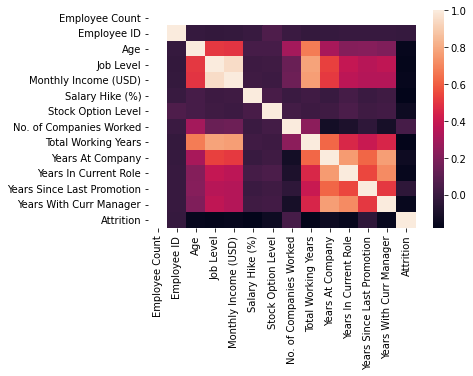

In [ ]:
sns.heatmap(a)

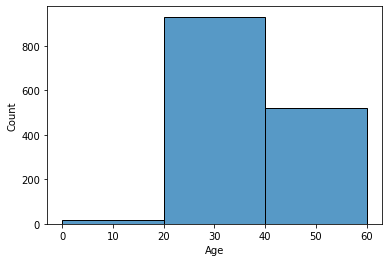

In [ ]:
sns.histplot(data=df,x='Age',bins=[0,20,40,60])